In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## reading data from file

In [48]:
data=pd.read_csv("haberman.data", names=["Age","Year of operation","Number of positive cases","Survival status"])
data

,Age,Year of operation,Number of positive cases,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


## split data into train and test

In [49]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.2, random_state=0)

## split X,y in train and test

In [50]:
X_train=train.iloc[:,0:3]
y_train=train.iloc[:,3]
X_test=test.iloc[:,0:3]
y_test=test.iloc[:,3]

## normalize

In [55]:
import warnings
warnings.filterwarnings('ignore')
#column Age
mean1=X_train.loc[: , "Age"].mean()
std1=X_train.loc[: , "Age"].std()
X_train.loc[: , "Age"]=(X_train.loc[:, "Age"]-mean1)/std1
X_test.loc[: ,"Age"]=(X_test.loc[: ,"Age"]-mean1)/std1
#column Year of operation
mean2=X_train.loc[: , "Year of operation"].mean()
std2=X_train.loc[: , "Year of operation"].std()
X_train.loc[: ,"Year of operation"]=(X_train.loc[: , "Year of operation"]-mean2)/std2
X_test.loc[:, "Year of operation"]=(X_test.loc[: ,"Year of operation"]-mean2)/std2
#column Number of positive cases
mean3=X_train.loc[: ,"Number of positive cases"].mean()
std3=X_train.loc[: , "Number of positive cases"].std()
X_train.loc[:, "Number of positive cases"]=(X_train.loc[: , "Number of positive cases"]-mean3)/std3
X_test.loc[:, "Number of positive cases"]=(X_test.loc[: , "Number of positive cases"]-mean3)/std3

## (1) plot accuracy and error of train and test with different k's

Text(0, 0.5, 'error of test')

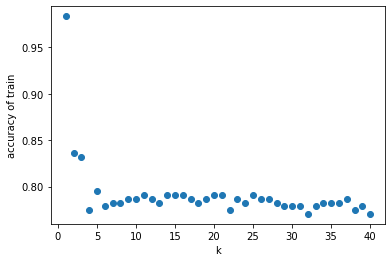

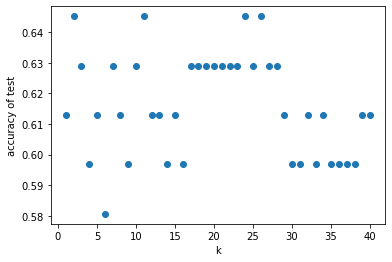

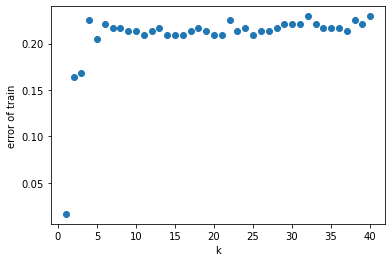

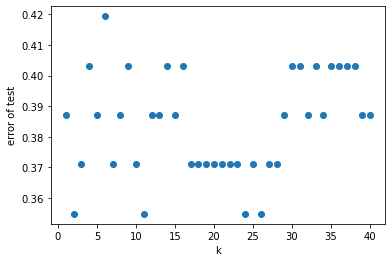

In [56]:
acc_train=[]
acc_test=[]
err_train=[]
err_test=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(X_train, y_train)
    ytrain_pred=knn.predict(X_train)
    acc_train.append(accuracy_score(y_train,ytrain_pred))
    err_train.append((y_train!=ytrain_pred).mean())
    ytest_pred=knn.predict(X_test)
    acc_test.append(accuracy_score(y_test,ytest_pred))
    err_test.append((y_test!=ytest_pred).mean())
k=np.array(range(1,41))
plot1 = plt. figure(1)
plt.scatter(k,acc_train)
plt.xlabel("k")
plt.ylabel("accuracy of train")
plot2 = plt. figure(2)
plt.scatter(k,acc_test)
plt.xlabel("k")
plt.ylabel("accuracy of test")
plot3 = plt. figure(3)
plt.scatter(k,err_train)
plt.xlabel("k")
plt.ylabel("error of train")
plot4 = plt. figure(4)
plt.scatter(k,err_test)
plt.xlabel("k")
plt.ylabel("error of test")

## (2) see changes in algorithm because of different k's

Text(0, 0.5, 'Number of positive cases')

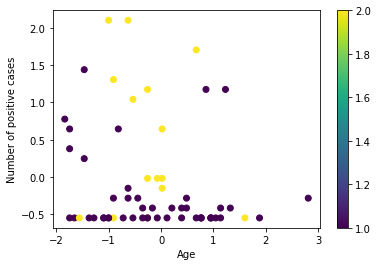

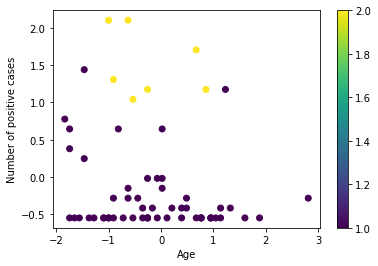

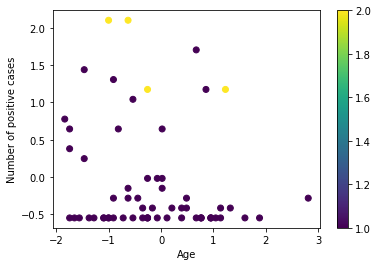

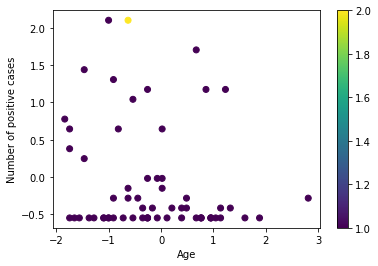

In [57]:
k=1
knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
plot5 = plt. figure(5)
points=plt.scatter(X_test["Age"],X_test["Number of positive cases"],c= y_pred)
plt.colorbar(points)
plt.xlabel("Age")
plt.ylabel("Number of positive cases")
k=5
knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
plot6 = plt. figure(6)
points=plt.scatter(X_test["Age"],X_test["Number of positive cases"],c= y_pred)
plt.colorbar(points)
plt.xlabel("Age")
plt.ylabel("Number of positive cases")
k=20
knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
plot7 = plt. figure(7)
points=plt.scatter(X_test["Age"],X_test["Number of positive cases"],c= y_pred)
plt.colorbar(points)
plt.xlabel("Age")
plt.ylabel("Number of positive cases")
k=40
knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
plot8 = plt. figure(8)
points=plt.scatter(X_test["Age"],X_test["Number of positive cases"],c= y_pred)
plt.colorbar(points)
plt.xlabel("Age")
plt.ylabel("Number of positive cases")

## (3) best k with cross validation

In [58]:
from sklearn.model_selection import cross_val_score
k=[]
maxi=0
for i in range(1,41) : 
    knn = KNeighborsClassifier(n_neighbors=i ,metric="euclidean")
    # 5_fold cross validation
    scores=cross_val_score(estimator=knn, X=X_train,y=y_train, cv=5,scoring="accuracy")
    k.append((i,scores.mean()))
    if(scores.mean()>maxi):
        maxi=scores.mean()
print(k)
for i1,i2 in k:
    if(i2==maxi):
        print("best k is :",i1,"and its accuracy is", i2) 

[(1, 0.7046768707482994), (2, 0.7375), (3, 0.7046768707482993), (4, 0.7416666666666667), (5, 0.7416666666666667), (6, 0.7415816326530613), (7, 0.7457482993197279), (8, 0.7374999999999999), (9, 0.7456632653061224), (10, 0.7333333333333333), (11, 0.7537414965986394), (12, 0.7456632653061225), (13, 0.7538265306122449), (14, 0.7538265306122448), (15, 0.7620748299319728), (16, 0.7619897959183674), (17, 0.7701530612244898), (18, 0.7701530612244898), (19, 0.7660714285714286), (20, 0.7701530612244898), (21, 0.7783163265306123), (22, 0.7619897959183674), (23, 0.7742346938775511), (24, 0.7579081632653062), (25, 0.7660714285714286), (26, 0.7579081632653061), (27, 0.7701530612244898), (28, 0.7579081632653062), (29, 0.7619897959183674), (30, 0.7579081632653062), (31, 0.7660714285714285), (32, 0.7620748299319728), (33, 0.7579931972789116), (34, 0.749829931972789), (35, 0.7579931972789116), (36, 0.7539115646258504), (37, 0.7539115646258504), (38, 0.749829931972789), (39, 0.749829931972789), (40, 0.75